# Random numbers

In [4]:
import numpy as np

In [5]:
print( np.random.uniform(-1,+1,(15))  ) # example with uniform distribution from -1 to 1

[-0.4200764   0.82871554 -0.7789265   0.92143426  0.46955484  0.57937399
 -0.99430272 -0.77728382  0.91264541  0.88582381  0.00365504 -0.45101163
 -0.42646599  0.26266398 -0.1370532 ]


In [6]:
print( np.random.normal(0,1,(15)) ) # example with normal distribution with mu=0 and sigma=1

[-1.42158506  1.01858732  0.5437867  -0.64277087 -0.52036222  0.13391407
 -0.29122777 -1.18832362  1.38098574  1.20035051 -0.33298707  1.08027037
 -2.03750158  0.33046592 -0.75892171]


In [7]:
print( np.random.uniform(-1,+1,(7,15)) )

[[-0.33360335 -0.22785171 -0.14587567 -0.22320963 -0.46998294  0.88604776
   0.9835378   0.7565327   0.29625668  0.38376209 -0.93057423 -0.23614956
   0.84437304  0.4308585  -0.96355435]
 [-0.87738491  0.25061748 -0.23545582 -0.81648042  0.25232291 -0.37431433
   0.14093004  0.15961545 -0.09002595  0.53637438  0.15074417  0.03435046
   0.37961212 -0.19746543  0.02736473]
 [-0.06887638  0.01875782 -0.03735929  0.78343275 -0.85957019  0.45478843
   0.84373778  0.24782015  0.69324889 -0.45223145  0.41185333 -0.53037159
   0.94078473 -0.51260186  0.14552921]
 [ 0.98002187 -0.42744753  0.2283961  -0.7575429  -0.75142409 -0.05305233
   0.49230374 -0.35168542  0.74727892 -0.17772139 -0.54984577  0.78705962
   0.52945536 -0.11686216  0.1412091 ]
 [ 0.81117385  0.45525898  0.87356588 -0.47571673 -0.85246773 -0.62752696
  -0.06321719 -0.89258919  0.01745978  0.96543075 -0.20320066  0.04628332
  -0.25253034  0.71263246  0.18163282]
 [ 0.29957008  0.61567736  0.26280136  0.84440307 -0.97793387 -0.

# Monte Carlo simulation for stock prices

We start from the definition of the daily log return, as $\text{daily log return}=\ln \frac{\text{price today}}{\text{price yesterday}}$. Applying the exponential to both sides of this definition we get:

$$\text{e}^\text{daily log return}=\frac{\text{price today}}{\text{price yesterday}}$$

$$\text{price yesterday}\cdot\text{e}^\text{daily log return}=\text{price today}$$

We have therefore a way to predict today's price using yesterday's price if we can estimate the daily log return.

We build a model for the daily log return as $\text{drift} + \text{volatility}$. 

Drift represents the general tendency of a stock, so we take it equal to the average daily logret that we have calculated in the past period minus half of is variance (to stay on the safe side and not overpredict it).

$$\text{drift} \sim \text{average daily logret} - \frac{\text{variance daily logret}}{2}$$

Volatility represents the random fluctuation around the trend that usually happens each day. We model it with the standard deviation of the logret multiplied by a random number, called $Z$. In this way volatility can fluctuate randomly according to a distribution that you choose.

$$\text{volatility} \sim \text{standard deviation logret} \cdot Z$$

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf

In [9]:
prices = yf.download("PG",start="2009-1-1")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [10]:
prices.head()

Date
2008-12-31    41.413746
2009-01-02    42.070255
2009-01-05    41.768791
2009-01-06    41.648205
2009-01-07    40.918011
Name: Adj Close, dtype: float64

In [11]:
logret=np.log(prices/prices.shift(1))

In [12]:
logret.head()

Date
2008-12-31         NaN
2009-01-02    0.015728
2009-01-05   -0.007192
2009-01-06   -0.002891
2009-01-07   -0.017688
Name: Adj Close, dtype: float64

In [13]:
logret.mean()

0.0003902251128011491

In [14]:
logret.var()

0.00012347501147487919

In [15]:
logret.std()

0.011111931041672244

In [16]:
drift=logret.mean()-logret.var()/2
print(drift)

0.0003284876070637095


While the drift is a number, the volatility is a distribution, because it is the standard deviation multiplied by a random number between 0 and 1. Therefore we build an array of 20 possible values.

In [17]:
volatility = logret.std()* np.random.uniform(-1,+1,(20)) # example with uniform distribution from -1 to 1
volatility = logret.std()* np.random.normal(0,1,(20)) # example with normal distribution with mu=0 and sigma=1
print(volatility)

[ 0.00830551  0.00496502  0.02576894 -0.00431608 -0.00413459  0.00494827
 -0.00335116 -0.00495872  0.00850932  0.01292325 -0.00962226 -0.01746485
 -0.00027738  0.00638405 -0.01227082  0.00501263  0.00834729  0.00778777
  0.01713953 -0.01020141]


In [18]:
tomorrow_price=prices[-1]*np.exp(drift+volatility)
print(tomorrow_price)

[152.00174123 151.49482806 154.67952639 150.09529283 150.12253727
 151.49229071 150.24019331 149.99886681 152.03272381 152.70526784
 149.3009702  148.13464347 150.70270846 151.7099562  148.90606022
 151.50203998 152.00809198 151.92306445 153.35047615 149.21452768]


## Building long-term predictions 

Now we want to build predictions for 250 days, therefore we build 20 volatities for each day.

In [19]:
volatility = logret.std()* np.random.uniform(-1,+1,(250,20)) # same, uniform distribution from -1 to 1
volatility = logret.std()* np.random.normal(0,1,(250,20)) # example with normal distribution with mu=0 and sigma=1
print(volatility)

[[-1.06087056e-04 -5.06154257e-05  1.30438562e-02 ...  4.01070664e-03
   2.15584930e-02  1.56708775e-02]
 [ 2.04193451e-03  2.24906418e-02  1.07292461e-03 ...  1.60147724e-02
  -9.92590980e-03  5.39470666e-03]
 [ 5.45422200e-04  2.22894864e-02  2.09825499e-03 ...  5.52639745e-03
   1.73144040e-02 -1.49353207e-02]
 ...
 [ 9.41428242e-03  7.96341661e-03  6.21608827e-03 ...  8.60375430e-03
   9.06483473e-03  1.46410636e-02]
 [-2.25807164e-02 -9.00697798e-03 -3.83719635e-03 ... -4.56402711e-03
  -1.03402276e-02 -6.36423880e-03]
 [ 8.68364687e-03 -1.36766998e-02  1.47899449e-02 ...  2.91194014e-02
   6.18146066e-03 -1.41553469e-03]]


In [20]:
expDailyReturns=np.exp(drift+volatility)

In [21]:
expDailyReturns

array([[1.00022243, 1.00027791, 1.01346215, ..., 1.00434862, 1.02212826,
        1.01612804],
       [1.00237323, 1.02308148, 1.00140239, ..., 1.01647754, 0.99044849,
        1.0057396 ],
       [1.00087429, 1.0228757 , 1.00242969, ..., 1.00587206, 1.01779945,
        0.98549933],
       ...,
       [1.00979039, 1.00832638, 1.00656604, ..., 1.00897225, 1.00943758,
        1.01508216],
       [0.97799353, 0.99135906, 0.99649744, ..., 0.99577342, 0.99003821,
        0.99398243],
       [1.00905287, 0.98674048, 1.01523329, ..., 1.02988577, 1.00653118,
        0.99891354]])

We put this into a DataFrame

In [22]:
expDailyReturns=pd.DataFrame(expDailyReturns)

In [23]:
expDailyReturns

0         1         2         3         4         5         6   \
0    1.000222  1.000278  1.013462  1.026827  0.984132  1.010609  0.991853   
1    1.002373  1.023081  1.001402  0.987477  0.981043  0.997456  0.997486   
2    1.000874  1.022876  1.002430  0.980273  0.989445  1.007960  1.006577   
3    0.996644  0.995286  0.985010  0.988389  0.997737  1.005119  0.985050   
4    0.999050  1.013234  0.990339  1.013702  1.000961  1.000792  0.989645   
..        ...       ...       ...       ...       ...       ...       ...   
245  0.988792  0.987351  1.013712  0.990450  1.006778  1.011586  0.986215   
246  0.997410  1.009102  1.011571  1.002902  0.998174  0.993913  0.994083   
247  1.009790  1.008326  1.006566  0.992180  1.002888  1.001066  1.017989   
248  0.977994  0.991359  0.996497  1.016670  0.985803  1.005811  0.986174   
249  1.009053  0.986740  1.015233  0.991538  0.989027  0.979533  1.001088   

           7         8         9         10        11        12        13  \
0    1.015295  1.015091  0.987782  1.006248  1.018333  1.003966  0.980975   
1    1.016008  1.009856  0.978970  0.995094  1.026742  0.991815  1.007526   
2    1.019362  1.022991  0.987445  1.003417  0.998198  0.983836  0.996528   
3    0.993004  0.987961  0.999836  1.002742  1.005924  0.987314  0.983866   
4    0.977752  1.001518  0.988220  0.996555  1.007383  1.016098  1.003614   
..        ...       ...       ...       ...       ...       ...       ...   
245  1.010295  1.006939  1.028730  0.987089  0.987493  0.978946  1.001167   
246  0.993723  1.009844  1.007689  0.976120  0.989763  1.025096  1.015628   
247  0.998674  1.009200  1.003202  1.010735  1.015836  1.009610  1.001004   
248  1.024571  0.984033  1.006153  0.987045  0.996110  1.006209  1.016667   
249  0.975889  1.004804  1.003326  0.976782  1.007335  1.006035  1.003119   

           14        15        16        17        18        19  
0    0.976442  0.995395  0.993623  1.004349  1.022128  1.016128  
1    1.008858  0.991709  1.004644  1.016478  0.990448  1.005740  
2    1.004837  0.996168  1.006310  1.005872  1.017799  0.985499  
3    1.002035  0.991885  1.001934  0.994117  0.994674  0.992413  
4    0.998688  1.008655  1.027756  1.015712  0.994788  0.984160  
..        ...       ...       ...       ...       ...       ...  
245  0.993390  1.013266  1.004416  0.996972  0.991008  1.019346  
246  0.995297  1.007490  1.007578  0.999051  1.008324  0.998387  
247  1.001776  1.003482  1.028128  1.008972  1.009438  1.015082  
248  1.013267  1.012624  1.003439  0.995773  0.990038  0.993982  
249  1.000446  0.986477  1.007725  1.029886  1.006531  0.998914  

[250 rows x 20 columns]

Note that each column is a simulation of the daily returns and each row is a day.

We will now go on along these 250 days and for each one we will use the just-estimated price as yesterday's price. Unfortunately this cannot be vectorized and we need a loop.

In [24]:
startPrice=prices.iloc[-1]
print(startPrice)

150.69500732421875


In [25]:
# we prepare the DataFrame where we put the prices
futurePrices=pd.DataFrame(np.zeros((251,20))) # this creates a matrix 251x20 full of zeroes

# we put yesterday's price in the first row
futurePrices.iloc[0]=startPrice

In [26]:
futurePrices

0           1           2           3           4           5   \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
246    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
247    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
248    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
249    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
250    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

             6           7           8           9           10          11  \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
246    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
247    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
248    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
249    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
250    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

             12          13          14          15          16          17  \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
246    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
247    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
248    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
249    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
250    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

             18          19  
0    150.695007  150.695007  
1      0.000000    0.000000  
2      0.000000    0.000000  
3      0.000000    0.000000  
4      0.000000    0.000000  
..          ...         ...  
246    0.000000    0.000000  
247    0.000000    0.000000  
248    0.000000    0.000000  
249    0.000000    0.000000  
250    0.000000    0.000000  

[251 rows x 20 columns]

In [27]:
for i in range(1,251):
    futurePrices.iloc[i]=futurePrices.iloc[i-1]*expDailyReturns.iloc[i-1]

futurePrices

0           1           2           3           4           5   \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1    150.728526  150.736887  152.723687  154.737697  148.303741  152.293789   
2    151.086240  154.216117  152.937866  152.799943  145.492360  151.906335   
3    151.218333  157.743919  153.309457  149.785728  143.956622  153.115481   
4    150.710852  157.000343  151.011360  148.046613  143.630828  153.899307   
..          ...         ...         ...         ...         ...         ...   
246  118.718181  125.917882  165.802720  128.653975  134.851546  203.853573   
247  118.410742  127.063963  167.721143  129.027373  134.605284  202.612710   
248  119.570029  128.121946  168.822406  128.018400  134.993972  202.828777   
249  116.938714  127.014852  168.231096  130.152523  133.077409  204.007316   
250  117.997344  125.330696  170.793809  129.051163  131.617198  199.831812   

             6           7           8           9           10          11  \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1    149.467341  152.999860  152.969091  148.853878  151.636593  153.457728   
2    149.091547  155.449055  154.476757  145.723508  150.892610  157.561429   
3    150.072105  158.458786  158.028359  143.893939  151.408201  157.277425   
4    147.828559  157.350256  156.125827  143.870379  151.823403  158.209123   
..          ...         ...         ...         ...         ...         ...   
246  149.598068  191.203774  232.969655  194.489563  167.028666  206.659764   
247  148.712969  190.003572  235.262906  195.985005  163.039994  204.544291   
248  151.388198  189.751615  237.427322  196.612575  164.790226  207.783353   
249  149.295118  194.413915  233.636298  197.822403  162.655379  206.975049   
250  149.457615  189.726482  234.758636  198.480321  158.878829  208.493219   

             12          13          14          15          16          17  \
0    150.695007  150.695007  150.695007  150.695007  150.695007  150.695007   
1    151.292614  147.828023  147.144984  150.001006  149.734034  151.350323   
2    150.054273  148.940576  148.448387  148.757384  150.429442  153.844204   
3    147.628856  148.423406  149.166409  148.187364  151.378710  154.747586   
4    145.755997  146.028702  149.469951  146.984795  151.671537  153.837263   
..          ...         ...         ...         ...         ...         ...   
246  134.965473  220.150055  157.518248  124.405290  151.081083  173.944273   
247  138.352629  223.590628  156.777409  125.337072  152.226050  173.779119   
248  139.682232  223.815218  157.055814  125.773527  156.507905  175.338309   
249  140.549555  227.545506  159.139534  127.361256  157.046084  174.597227   
250  141.397814  228.255110  159.210562  125.638912  158.259314  179.815199   

             18          19  
0    150.695007  150.695007  
1    154.029625  153.125422  
2    152.558409  154.004302  
3    155.273864  151.771136  
4    154.446845  150.619664  
..          ...         ...  
246  148.895767  159.656710  
247  150.135123  159.399109  
248  151.552035  161.803191  
249  150.042306  160.829529  
250  151.022260  160.654794  

[251 rows x 20 columns]

<AxesSubplot:>

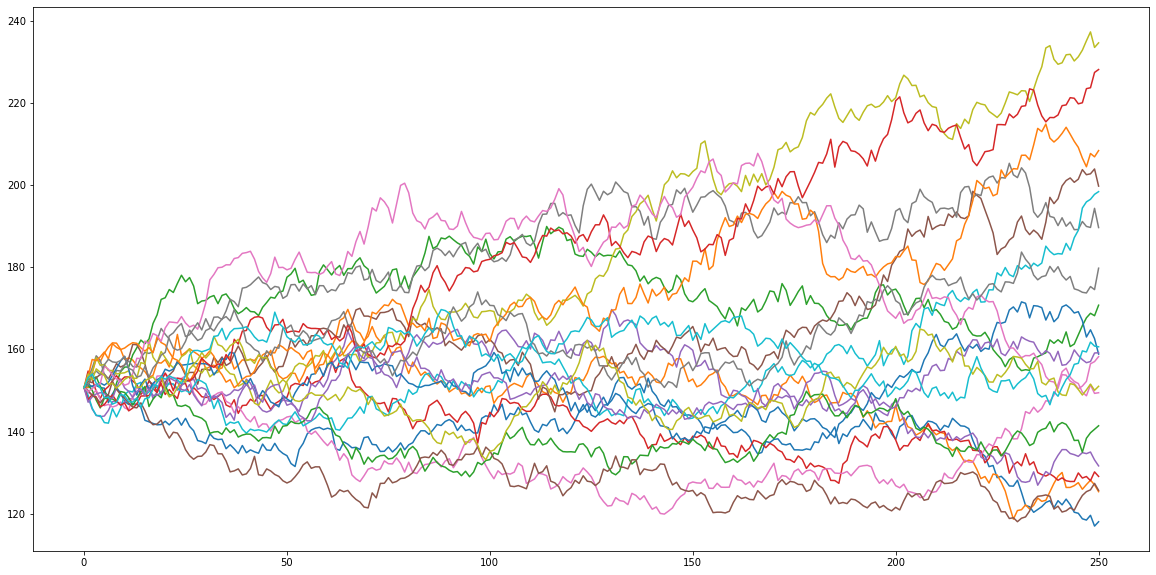

In [28]:
futurePrices.plot(figsize=(20,10),legend=None)